In [12]:
import pandas as pd

df = pd.read_csv('imdb_indonesian_movies_2.csv')
df = df.drop(columns=['judul_film'])
df

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama
...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,Romantis
1001,Markonah melarikan diri ke Jakarta karena akan...,Romantis
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",Romantis
1003,Proyek baru ini adalah tentang seorang lelaki ...,Romantis


In [13]:
category = pd.get_dummies(df.genre)

df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['genre'])
df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


In [14]:
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sinopsis, label, test_size=0.2)

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sekuens_latih = tokenizer.texts_to_sequences(X_train)
sekuens_test = tokenizer.texts_to_sequences(X_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [28]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(526, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    padded_latih, y_train,
    validation_data=(padded_test, y_test),
    epochs=30,
    verbose=2
)

Epoch 1/30
26/26 - 5s - loss: 1.6108 - accuracy: 0.1928 - val_loss: 1.6122 - val_accuracy: 0.1443 - 5s/epoch - 186ms/step
Epoch 2/30
26/26 - 1s - loss: 1.6091 - accuracy: 0.2127 - val_loss: 1.6141 - val_accuracy: 0.1443 - 1s/epoch - 50ms/step
Epoch 3/30
26/26 - 1s - loss: 1.5930 - accuracy: 0.2898 - val_loss: 1.5992 - val_accuracy: 0.2687 - 1s/epoch - 49ms/step
Epoch 4/30
26/26 - 1s - loss: 1.3870 - accuracy: 0.5187 - val_loss: 1.6377 - val_accuracy: 0.2886 - 1s/epoch - 50ms/step
Epoch 5/30
26/26 - 1s - loss: 0.7001 - accuracy: 0.7500 - val_loss: 2.2021 - val_accuracy: 0.3184 - 1s/epoch - 49ms/step
Epoch 6/30
26/26 - 1s - loss: 0.2678 - accuracy: 0.9129 - val_loss: 2.8822 - val_accuracy: 0.3333 - 1s/epoch - 49ms/step
Epoch 7/30
26/26 - 1s - loss: 0.1122 - accuracy: 0.9602 - val_loss: 3.2326 - val_accuracy: 0.2438 - 1s/epoch - 49ms/step
Epoch 8/30
26/26 - 1s - loss: 0.0509 - accuracy: 0.9900 - val_loss: 3.9048 - val_accuracy: 0.2886 - 1s/epoch - 50ms/step
Epoch 9/30
26/26 - 1s - loss: 0

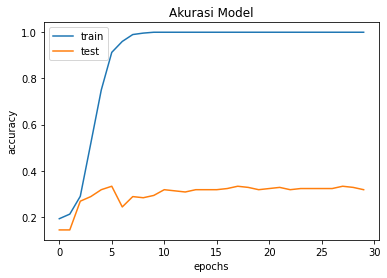

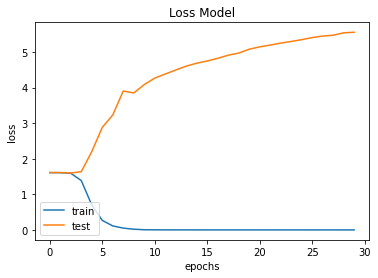

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower left')
plt.show()